# 📘 Zipf's Law and Statistical Language Analysis

This notebook explores **Zipf's Law** using a real text corpus (e.g., *War and Peace* by Leo Tolstoy).  
It demonstrates how word frequency distribution in natural language follows a power-law relationship,  
where a few words occur very often while most appear rarely.

The analysis includes:
- Word frequency distribution and verification of Zipf's Law  
- Vocabulary coverage (how many words cover 90% of the text)  
- Word co-occurrence graph and identification of the "core language"  
- Visualization of the rank–frequency product  



In [68]:
# ==================================================
# PROJECT: Statistical Language Processing (Zipf's Law)
# Author: ppaczek04
# ==================================================

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# --- 1. Load text file ---

# Huge thanks to the "project Gutenberg" which shares many famous books in txt format for free
# Make sure "war_and_peace.txt" is in the same folder
with open("war_and_peace.txt", "r", encoding="utf-8") as f:
    text = f.read()

print("Characters in text:", len(text))

Characters in text: 3227578


## 🔹 Text Preprocessing and Tokenization

The text is converted to lowercase, and only alphabetic characters are kept.  
We then split the text into individual tokens (words) using regular expressions.  
This step removes punctuation and ensures consistent word forms for frequency analysis.


In [69]:
# --- 2. Basic cleaning and tokenization  ---
text = text.lower()
tokens = re.findall(r'\b[a-záéíóöőúüűąćęłńóśźż]+\b', text)

print("Number of tokens:", len(tokens))

# --- 3. Word frequency analysis ---
freq = Counter(tokens)
freq_df = pd.DataFrame(freq.items(), columns=["word", "frequency"])
freq_df = freq_df.sort_values(by="frequency", ascending=False).reset_index(drop=True)
freq_df["rank"] = freq_df.index + 1
freq_df["rank*freq"] = freq_df["rank"] * freq_df["frequency"]

freq_df.head(20)

Number of tokens: 575435


,word,frequency,rank,rank*freq
0,the,34737,1,34737
1,and,22302,2,44604
2,to,16759,3,50277
3,of,15013,4,60052
4,a,10583,5,52915
5,he,10007,6,60042
6,in,9039,7,63273
7,that,8205,8,65640
8,his,7984,9,71856
9,was,7365,10,73650


## 📊 Zipf's Law Visualization

According to Zipf's Law, the frequency of any word is inversely proportional to its rank.  
Here we plot the **log–log relationship** between word rank and frequency.  
The blue points represent actual data, while the red line shows the *ideal Zipfian distribution*.



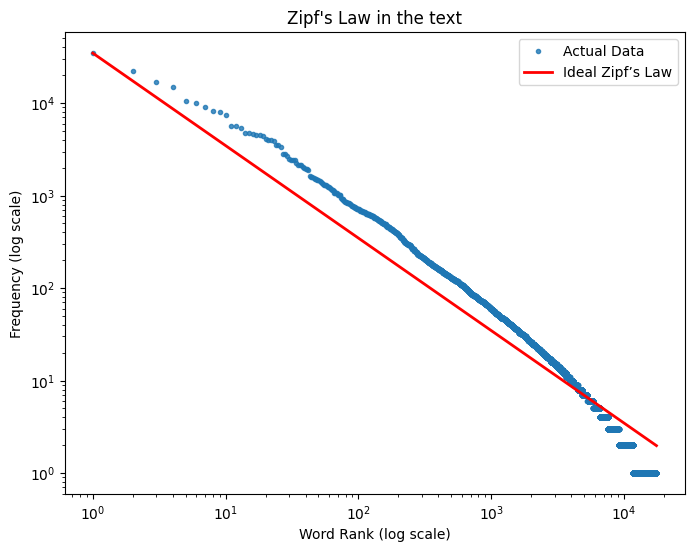

   word  frequency  rank  rank*freq
0   the      34737     1      34737
1   and      22302     2      44604
2    to      16759     3      50277
3    of      15013     4      60052
4     a      10583     5      52915
5    he      10007     6      60042
6    in       9039     7      63273
7  that       8205     8      65640
8   his       7984     9      71856
9   was       7365    10      73650
Average of rank × frequency: 28977.94


In [70]:
# --- 4. Zipf’s Law Visualization ---
plt.figure(figsize=(8,6))

# Actual data (blue dots)
plt.loglog(freq_df["rank"], freq_df["frequency"], marker=".", linestyle='none', label="Actual Data", alpha=0.8)

# Ideal Zipf line (red)
# Build ideal frequencies: f = f1 / rank
f1 = freq_df["frequency"].iloc[0]  # frequency of the most common word
ranks = np.arange(1, len(freq_df) + 1)
ideal_freq = f1 / ranks
plt.loglog(ranks, ideal_freq, color="red", linewidth=2, label="Ideal Zipf’s Law")

plt.xlabel("Word Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.title("Zipf's Law in the text")
plt.legend()
plt.show()

print(freq_df.head(10))
print("Average of rank × frequency:", round(freq_df["rank*freq"].mean(), 2))

## ⚖️ Product of Rank × Frequency

Zipf's Law implies that the product `rank × frequency` should remain approximately constant.  
This plot helps visualize how closely our text follows this theoretical relationship.  
A stable horizontal line would indicate a perfect Zipfian pattern.


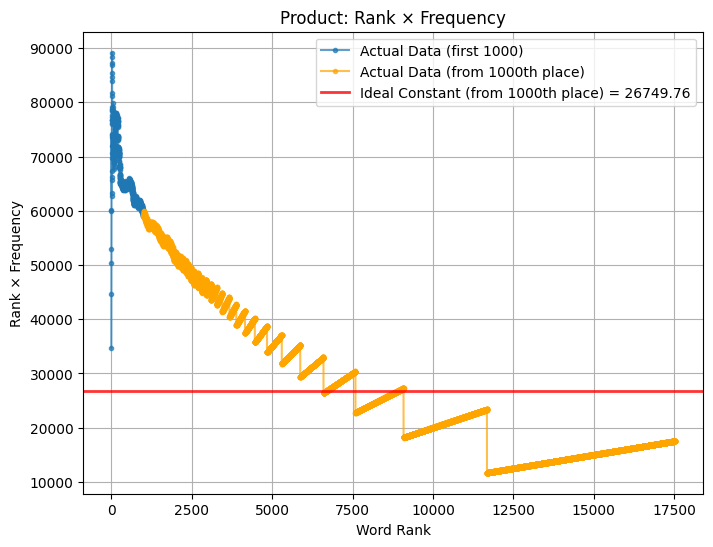

In [71]:
# --- 4b. Product of Rank × Frequency (Zipf’s Law test) ---

plt.figure(figsize=(8,6))

# Extract rank and frequency values
ranks = freq_df["rank"].values
freqs = freq_df["frequency"].values
products = ranks * freqs

# Ideal constant (starting from rank 1000 to avoid noise)
ideal_product = products[999:].mean()

# Plot actual data for first 1000 and beyond
plt.plot(ranks[:1000], products[:1000], marker='.', label='Actual Data (first 1000)', alpha=0.7)
plt.plot(ranks[999:], products[999:], marker='.', label='Actual Data (from 1000th place)', alpha=0.7, color='orange')

# Ideal constant line
plt.axhline(y=ideal_product, color='r', linestyle='-', linewidth=2,
            label=f'Ideal Constant (from 1000th place) = {ideal_product:.2f}', alpha=0.8)

plt.title("Product: Rank × Frequency")
plt.xlabel("Word Rank")
plt.ylabel("Rank × Frequency")
plt.legend()
plt.grid(True)
plt.show()

## 📈 Vocabulary Coverage (90%)

In this section, we calculate how many of the most frequent words account for **90% of all word occurrences** in the text.  
This measure shows how much vocabulary a reader must know to understand the majority of the text.  
The red dashed line marks the 90% threshold on the cumulative coverage curve.


To cover 90% of the text, you need 2525 most frequent words.


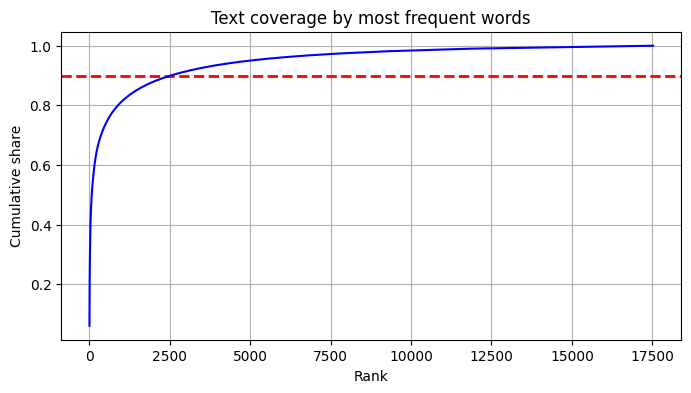

In [72]:
# --- 5. Vocabulary coverage for 90% of the text ---
total = sum(freq_df["frequency"])
freq_df["share"] = freq_df["frequency"] / total
freq_df["cumulative"] = freq_df["share"].cumsum()

coverage_90 = freq_df[freq_df["cumulative"] <= 0.9]
print(f"To cover 90% of the text, you need {len(coverage_90)} most frequent words.")

plt.figure(figsize=(8,4))

# Add horizontal dashed line at 0.9
plt.axhline(y=0.9, color='red', linestyle='--', linewidth=2, label='90% coverage')

plt.plot(freq_df["rank"], freq_df["cumulative"], color='blue', label="Cumulative share")
plt.xlabel("Rank")
plt.ylabel("Cumulative share")
plt.title("Text coverage by most frequent words")
plt.grid(True)
plt.show()

## 🕸️ Word Co-occurrence Network

In this section, we construct an **undirected co-occurrence graph**,  
where each node represents a unique word and each edge connects two words  
that appear next to each other in the text.  

This type of network helps visualize **syntactic and grammatical relationships** between words.  
Highly connected nodes (with many neighbors) usually correspond to:
- **Function words** such as *and, the, of, to, in*, which appear frequently across contexts, or  
- **Common connectors** that hold the sentence structure together.  

The resulting graph allows us to identify the **core language** —  
a small set of words that form the backbone of most sentences in the corpus.  

By analyzing degree centrality (number of neighbors for each node),  
we can highlight which words play the most important structural roles in the text.  



In [73]:
# --- 6. Co-occurrence graph ---
# Build undirected graph: words are connected if they appear next to each other
G = nx.Graph()
for i in range(len(tokens) - 1):
    w1, w2 = tokens[i], tokens[i+1]
    if G.has_edge(w1, w2):
        G[w1][w2]["weight"] += 1
    else:
        G.add_edge(w1, w2, weight=1)

# Degree centrality (number of neighbors)
degree_centrality = nx.degree_centrality(G)
deg_df = pd.DataFrame(list(degree_centrality.items()), columns=["word", "centrality"])
deg_df = deg_df.sort_values(by="centrality", ascending=False).reset_index(drop=True)

core_words = deg_df.head(50)
print("=== Core language (50 words with most neighbors) ===")
print(core_words)

=== Core language (50 words with most neighbors) ===
      word  centrality
0      and    0.443677
1      the    0.417599
2       of    0.258674
3        a    0.220498
4       to    0.220441
5       in    0.179354
6      his    0.167998
7       he    0.162463
8     that    0.155958
9      was    0.146599
10    with    0.143118
11     but    0.125371
12      it    0.105798
13     her    0.105113
14       s    0.101518
15      as    0.100548
16      on    0.099464
17     for    0.094042
18      at    0.092901
19     had    0.090733
20      by    0.086225
21    were    0.085426
22      or    0.085369
23       i    0.083200
24    from    0.082687
25     she    0.078749
26     not    0.076467
27      is    0.075439
28     him    0.075154
29     you    0.069961
30    this    0.069733
31   their    0.066994
32   which    0.065168
33     who    0.064940
34     all    0.063855
35    said    0.063171
36      so    0.062429
37    they    0.061801
38     one    0.057407
39  pierre    0.055695
40  

And here is a final visualisation of the graph

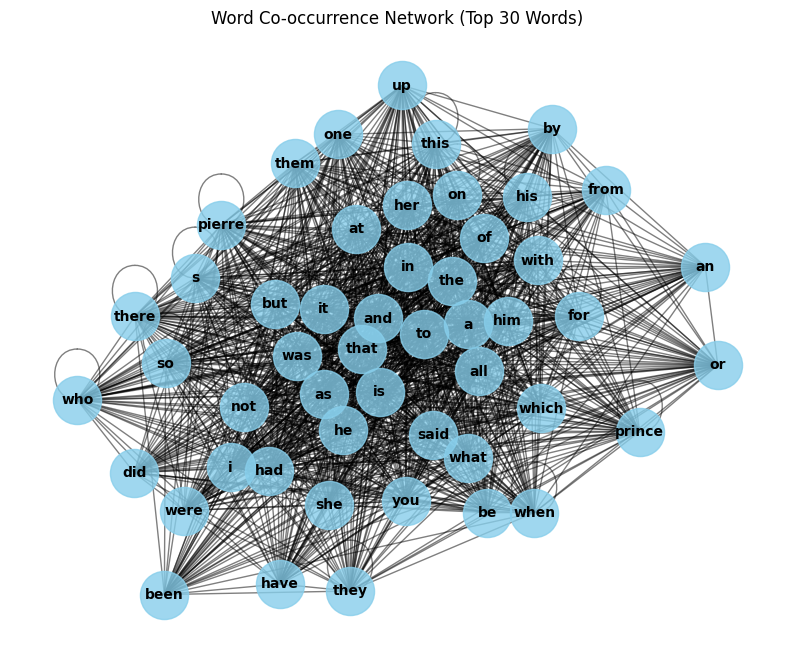

In [66]:
# --- 6b. Visualize the co-occurrence graph ---

# Extract subgraph of the 50 most frequent words
top_words = set(freq_df.head(50)["word"])
subG = G.subgraph(top_words)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, k=0.5, seed=42)

# Draw nodes and edges
nx.draw_networkx_nodes(subG, pos, node_color="skyblue", node_size=1200, alpha=0.8)
nx.draw_networkx_edges(subG, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(subG, pos, font_size=10, font_weight="bold")

plt.title("Word Co-occurrence Network (Top 30 Words)")
plt.axis("off")
plt.show()


In [67]:
# --- 7. Most frequent nouns-like words (simple heuristic)
# We'll just take the 50 most frequent words longer than 3 characters (approx. content words)
noun_like = freq_df[freq_df["word"].str.len() > 3].head(50)
print("=== 50 most frequent content words ===")
print(noun_like)

# --- 8. Compare with Swadesh list ---
swadesh_list = [
    "i", "you", "he", "we", "this", "that", "who", "what", "where",
    "when", "how", "not", "all", "many", "one", "two", "big", "long",
    "small", "woman", "man", "person", "child", "fish", "bird", "dog",
    "tree", "leaf", "root", "bark", "flower", "grass", "fruit", "seed",
    "stone", "water", "fire", "earth", "wind", "sky", "sun", "moon",
    "star", "night", "day", "year", "hot", "cold", "full"
]

common = set(noun_like["word"]).intersection(swadesh_list)
print("=== Words shared with the Swadesh list ===")
print(common)

=== 50 most frequent content words ===
        word  frequency  rank  rank*freq     share  cumulative
7       that       8205     8      65640  0.014259    0.220086
10      with       5710    11      62810  0.009923    0.256682
26      said       2842    27      76734  0.004939    0.374442
28      from       2709    29      78561  0.004708    0.384036
31      were       2425    32      77600  0.004214    0.396797
32      what       2399    33      79167  0.004169    0.400966
33      they       2255    34      76670  0.003919    0.404885
36      this       2120    37      78440  0.003684    0.416049
37     which       2064    38      78432  0.003587    0.419636
38      have       1982    39      77298  0.003444    0.423080
39    pierre       1963    40      78520  0.003411    0.426491
40    prince       1928    41      79048  0.003351    0.429842
45     there       1562    46      71852  0.002714    0.444240
46      them       1529    47      71863  0.002657    0.446897
47      when    